# Fermat's Principle as a Consequence of Wave Interference

In [1]:
import numpy as np
import matplotlib.pyplot as plt

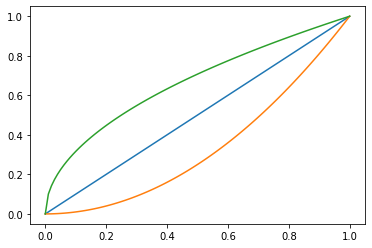

In [2]:
# Create three different possible paths from (0,0) to (1,1) in the x--y plane
x = np.linspace(0,1,100)
y1 = x
y2 = x**2
y3 = np.sqrt(x)

plt.plot(x,y1,x,y2,x,y3);

Obviously path $(x,y1)$ (in blue) is going to be our least-time path, the one that rays of light actually follow. But let's see why.

In [3]:
# Define a function to perturb a path slightly by a random curve. This is some Fourier transform black magic which builds a random-ish function out of sine waves.
def randomPerturbation(length, n=1):
    """
    Inputs:
        length: number of points to sample along curve
        n: spectral index of perturbations (~k^(-n)). n=0 is white noise; higher ns are smoother perturbations
    Output:
        arr: numpy array with shape (length,). arr[0] and arr[-1] are always equal to 0 (up to numerical accuracy) to preserve endpoints
    """
    shape = (length-1,)
    amp = (np.random.default_rng().random(shape[0]-1)*2-1)/(np.arange(1,shape[0])**n)
    fft = np.append([0],1j*amp)
    return np.fft.irfft(fft,2*length-2)[0:length]

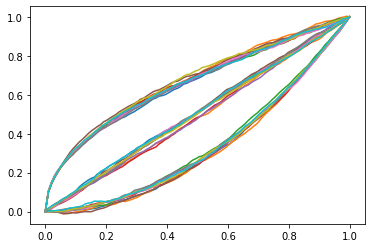

In [4]:
# Plot our 3 candidate curves with 10 different perturbations each
plt.plot(x,(y1+[2*randomPerturbation(x.size,1) for _ in range(10)]).T,
         x,(y2+[2*randomPerturbation(x.size,1) for _ in range(10)]).T,
         x,(y3+[2*randomPerturbation(x.size,1) for _ in range(10)]).T);

In [5]:
# Function to calculate the pathlength of the curve (proportional to travel time in a uniform medium)
def pathlength(x,y):
    dx = np.diff(x)
    dy = np.diff(y)
    return np.sum(np.sqrt(dx**2 + dy**2))

In [6]:
# Sample the pathlengths of perturbations around each path
p1 = [pathlength(x,y1 + 2*randomPerturbation(x.size,1)) for _ in range(1000)]
p2 = [pathlength(x,y2 + 2*randomPerturbation(x.size,1)) for _ in range(1000)]
p3 = [pathlength(x,y3 + 2*randomPerturbation(x.size,1)) for _ in range(1000)]

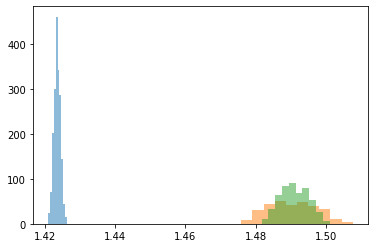

In [7]:
plt.hist(p1,density=True,alpha=0.5)
plt.hist(p2,density=True,alpha=0.5)
plt.hist(p3,density=True,alpha=0.5);

Note that the shortest-time path (blue) has a much narrower distribution of pathlengths, therefore travel times, therefore arrival phases than the non-shortest paths (yellow, green). Light waves that follow the non-shortest paths are, on average, washed out due to superposition of many random phases, but light that travels along the shortest path arrives nearly in phase.